# GG4257 - Urban Analytics
---
## Assignment 1
---

### Lab 3 Challenges

add in a table with hyperlinks to each challenge

In [86]:
# importing everything needed!
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from sodapy import Socrata
import numpy as np
from lonboard import Map, ScatterplotLayer

### Challenge 1

**What happens if you have non-numerical attributes?**

Please extend the `data_description` function to only accept numerical columns and calculate mean and counts. The outcome should be a table with Mean and Counts per Column.

> Tip: Check this function in pandas to filter the numerical values. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes
> Here some extra resources of creating function in python https://www.geeksforgeeks.org/python-functions/?ref=lbp


In [ ]:
def data_description2(x):
    if x.dtype == "object":
        print("NA - not float or integer")
        return
    else:
        stats = {'M': x.mean(), 'S': len(x)}
    return stats
        

def data_description3(x):
    filterx = x.select_dtypes(include=None, exclude="object")
    xStats = pd.DataFrame(columns=df1.columns, index= ) 
    stats = {'M': filterx.mean(), 'S': len(filterx)}
#    return stats


#subset_listings.select_dtypes(include=None, exclude="object")


### Challenge 2

Now is your turn to find, read, process and then make a comprehensive descriptive statistics analysis based on the previous resources and others you might need to look at. Create insightful visualizations combining both maps and charts to convey meaningful information about a chosen city.

1. Define a problem within the urban environment and choose a dataset related to urban life or city dynamics. This could include data on crime rates, housing prices, transportation, demographics, or any other urban-related dataset.
2. Get the data ideally using an **API, or web services**. But it's fine if you need to download the data. Describe why you had to use the traditional  method.
3. Work with the data cleaning and pre-processing, check for missing values, convert data types, and perform any other necessary preprocessing steps. You have the code for that in this and previous labs.
4. Use Pandas to calculate descriptive statistics such as `mean`, `median`, `standard deviation`, and other relevant measures. Explore `correlations` between different variables (Include at least one `univariate` and `bivariate` plots) 
6. Create at least one (or more) interactive map to visualize spatial aspects of the data. For example, plot crime rates across different neighbourhoods or visualize housing prices.
7. Complement with additional charts (line charts, bar charts, etc.) to extend the map and highlight key trends or patterns in the data.
8. As always, document well what you are doing and how you use `descriptive statistics and map visualizations` to extract insights from the data.
> You could try explaining any observed patterns, trends, or correlations, whether they are spatial or non-spatial. **Keep in mind** the defined problem and whether your analysis provides the required insights (Your conclusion could be that you need more data or another type of analysis)

In [ ]:
url_water = "https://services1.arcgis.com/cNVyNtjGVZybOQWZ/arcgis/rest/services/Drinking_fountains/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
response = requests.get(url_water) #result is 200 so we know the request works!
data = response.json()
waterdata = data["features"]
waterdata

In [56]:
id_list=[]
suburb_list=[]
long_list=[]
lat_list=[]
site_name_list =[]
location_list=[]
access_list =[]

In [58]:
for entry in waterdata:
    id_entry=entry['id']
    suburb_entry=entry['properties']['Suburb']
    long_entry=entry['geometry']['coordinates'][0]
    lat_entry=entry['geometry']['coordinates'][1]
    site_name_entry=entry['properties']['site_name']
    location_entry=entry['properties']['Location']
    access_entry=entry['properties']['Accessible']
    id_list.append(id_entry)
    suburb_list.append(suburb_entry),
    long_list.append(long_entry)    
    lat_list.append(lat_entry) 
    site_name_list.append(site_name_entry)
    location_list.append(location_entry)
    access_list.append(access_entry)

#for loop running through each entry of the dataframe and picking out the columns we want
# appends the columns we do want into lists

In [61]:
import geopandas as gpd
waterAccess_data = gpd.GeoDataFrame({
    'id':id_list,
    'suburb':suburb_list,
    'longitude':long_list,
    'latitude':lat_list,
    'site_name':site_name_list,
    'location': location_list,
    'accessibility': access_list
})

#creating a geodataframe with the lists we created in the previous cell!

waterAccess_data #checking the dataframe!

,id,suburb,longitude,latitude,site_name,location,accessibility
0,1,Newtown,151.181929,-33.895707,WJ Thurbon Playground,Park,No wheelchair access
1,2,Glebe,151.192401,-33.879331,M J (Paddy) Dougherty Reserve,Reserve,Wheelchair accessible
2,3,Glebe,151.184712,-33.879971,St James Park,Park,Wheelchair accessible
3,4,Glebe,151.184337,-33.880301,St James Park,Park,
4,5,Glebe,151.184114,-33.880468,John St Reserve,Park,
...,...,...,...,...,...,...,...
210,211,Glebe,151.186317,-33.880284,Dr H J Foley Rest Park,Park,Wheelchair accessible
211,212,Glebe,151.190097,-33.876816,Thomas Portley Reserve,Reserve,No wheelchair access
212,213,Ultimo,151.198724,-33.880724,Mary Ann Street Park,Park,Wheelchair accessible
213,214,Glebe,151.192209,-33.878243,Millard Reserve,Park,


In [62]:
# checking that we don't have any NAs
waterAccess_data.isna().sum() #there are no NAs in this dataset

id               0
suburb           0
longitude        0
latitude         0
site_name        0
location         0
accessibility    0
dtype: int64

In [66]:
geom = [Point(xy) for xy in zip(waterAccess_data.longitude, waterAccess_data.latitude)] #create a list of latitude, longitude pairs
waterfountains = gpd.GeoDataFrame(waterAccess_data, crs='EPSG:4326', geometry=geom)
waterfountains.explore()

In [67]:
suburbfountains = waterfountains['suburb'].value_counts()
suburbfountains

suburb
Sydney             35
Glebe              26
Alexandria         22
Erskineville       13
Newtown            11
Zetland            10
Redfern             9
Surry Hills         9
Rosebery            8
Camperdown          7
Millers Point       6
Ultimo              6
Moore Park          6
Waterloo            6
Pyrmont             5
Forest Lodge        5
Haymarket           4
Darlinghurst        3
Potts Point         3
Elizabeth Bay       3
Annandale           3
Woolloomooloo       3
Rushcutters Bay     2
Chippendale         2
Darlington          2
Beaconsfield        2
Barangaroo          1
Paddington          1
Dawes Point         1
The Rocks           1
Name: count, dtype: int64

<Axes: ylabel='suburb'>

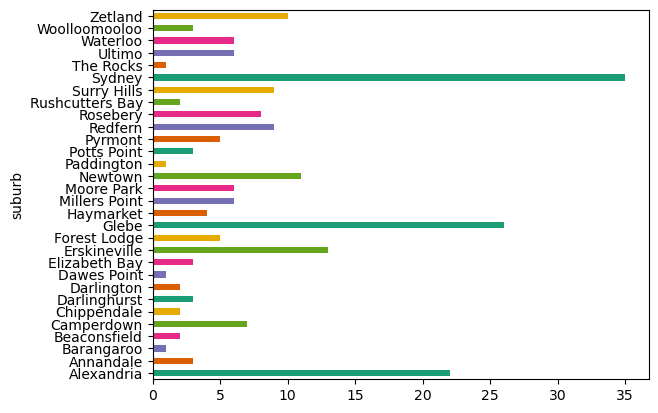

In [74]:
import seaborn as sns
waterfountains.groupby('suburb').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

In [95]:
waterfountains.explore("accessibility", cmap='Oranges', tiles='Esri_WorldGrayCanvas', zoom_start=100)

<Axes: xlabel='suburb', ylabel='count'>

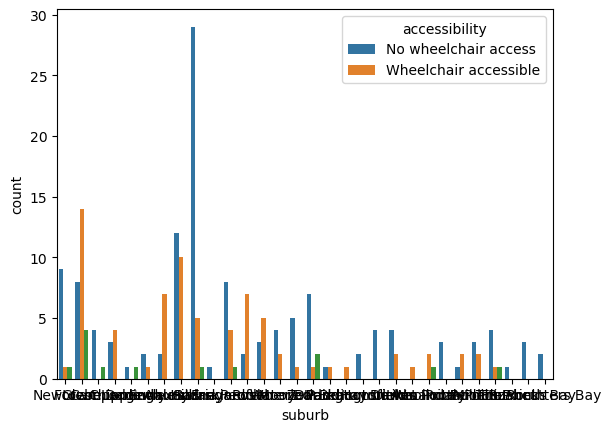

In [99]:
sns.countplot(waterfountains, x="suburb", hue="accessibility", stat="count")


In [90]:
import folium
from folium import plugins
from folium.plugins import MeasureControl
from branca.colormap import linear
from branca import colormap
from branca import colormap as cm

In [91]:
m = folium.Map([52.368152,4.897582], zoom_start=10)
location=filtered_row[["latitude","longitude"]]


plugins.MarkerCluster(location).add_to(m)
m

NameError: name 'filtered_row' is not defined

In [82]:
uniqueSuburbs = waterfountains['suburb'].unique()
colors = sns.color_palette("pastel", len(uniqueSuburbs))
color_dict = dict(zip(uniqueSuburbs, colors)) #dictionary to assign a colour to each suburb!
color_dict

{'Newtown': (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 'Glebe': (1.0, 0.7058823529411765, 0.5098039215686274),
 'Forest Lodge': (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 'Camperdown': (1.0, 0.6235294117647059, 0.6078431372549019),
 'Chippendale': (0.8156862745098039, 0.7333333333333333, 1.0),
 'Darlinghurst': (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 'Surry Hills': (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 'Alexandria': (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 'Sydney': (1.0, 0.996078431372549, 0.6392156862745098),
 'Barangaroo': (0.7254901960784313, 0.9490196078431372, 0.9411764705882353),
 'Erskineville': (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 'Redfern': (1.0, 0.7058823529411765, 0.5098039215686274),
 'Rosebery': (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 'Waterloo': (1.0, 0.6235294117647059, 0.6078431372549019),
 'Moore Park': (0.81568627

In [88]:
color_array = np.array([tuple(np.append(
    np.multiply(
        color_dict.get(x, (0, 0, 0)), 255).astype(int), 255)) 
                        for x in waterfountains['suburb']],
                       dtype=np.uint8)

layer = ScatterplotLayer.from_geopandas(waterfountains)
map = Map(layers=[layer], _height=500)
map

layer.radius_scale = 40
layer.opacity = 0.05
layer.get_fill_color = color_array
from lonboard import Map, ScatterplotLayer

layer = ScatterplotLayer.from_geopandas(waterfountains)
map = Map(layers=[layer], _height=500)
map

/Applications/miniconda3/envs/ua_py/lib/python3.11/site-packages/lonboard/_utils.py:57: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col_name] = pd.to_numeric(
/Applications/miniconda3/envs/ua_py/lib/python3.11/site-packages/lonboard/_utils.py:69: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col_name] = pd.to_numeric(
/Applications/miniconda3/envs/ua_py/lib/python3.11/site-packages/lonboard/_utils.py:69: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col_name] = pd.to_numeric(
/Applications/miniconda3/envs/ua_py/lib/python3.11/site-packages/lonboard/_geoarrow/ops/reproject.py:78: UserWarning: Input being reprojected to EPSG:4326 CR

Map(layers=[ScatterplotLayer(table=pyarrow.Table
id: uint8
suburb: string
longitude: float
latitude: float
sit…

In [ ]:
sydney_listings =pd.read_csv("listings.csv")

In [ ]:
subset_listings = sydney_listings[['id',
                            'latitude',
                            'longitude',
                            'price',
                           ]]
subset_listings = subset_listings.dropna()
subset_listings.head()
descriptive_stats = subset_listings.describe()
descriptive_stats

In [ ]:
geom = [Point(xy) for xy in zip(subset_listings.longitude, subset_listings.latitude)] #create a list of latitude, longitude pairs
sydney_prices = gpd.GeoDataFrame(subset_listings, crs=waterfountains.crs, geometry=geom)
sydney_prices.explore()

In [65]:
print(waterfountains.crs)

EPSG:28992


#### projected_waterfountains = waterfountains.to_crs('EPSG:28992')
print(projected_waterfountains.crs)

In [ ]:
from lonboard import viz
from lonboard import Map, ScatterplotLayer

layer = ScatterplotLayer.from_geopandas(sydney_prices)
map = Map(layers=[layer], _height=500)
map

In [ ]:

for i in sydney_prices:
    if sydney_prices.price < 109:
        print("hello")
    

### Challenge 3

1. Go to https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data 
2. Get the data for Motor Vehicle Collisions - Crashes Jan 2024. The dataset contains 2.06 M of records.
3. Use the API endpoint to map the data (e.g. https://data.cityofnewyork.us/resource/h9gi-nx95.json) 
   ![image.png](attachment:8b7103ca-9191-4b67-97c2-0cfb8b8468fc.png)
4. Customize the map by representing the data by `number_of_persons_killed` and `number_of_cyclist_killed`
5. Finally, calculate descriptive statistics for at least two attributes, such as `mean`, `standard deviation`, and other relevant measures 6. Justify/Describe the attribute selection.
7. Plot correlations between the chosen attributes and create `univariate` and/or `multivariate` charts to justify your insights.
   > Please take note that the dataset includes various numerical values. Hence, each student's attribute selection, justification, charts, and maps are expected to vary. 

In [2]:
client = Socrata("data.cityofnewyork.us",
                 "OqJ1MAAHZwI6PG504OjxCf9cY",
                 username="snft1@st-andrews.ac.uk",
                 password="UARepo2024")
results = client.get("h9gi-nx95", limit=1000000)
crashes2024 = pd.DataFrame.from_records(results)
crashes2024

,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,cross_street_name,contributing_factor_vehicle_3,vehicle_type_code_3,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,WHITESTONE EXPRESSWAY,20 AVENUE,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,QUEENSBORO BRIDGE UPPER,NaN,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-29T00:00:00.000,6:55,THROGS NECK BRIDGE,NaN,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-11T00:00:00.000,9:35,NaN,NaN,0,0,0,0,0,0,...,40.667202,-73.8665,"{'latitude': '40.667202', 'longitude': '-73.86...",1211 LORING AVENUE,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-12-14T00:00:00.000,8:13,SARATOGA AVENUE,DECATUR STREET,0,0,0,0,0,0,...,40.683304,-73.917274,"{'latitude': '40.683304', 'longitude': '-73.91...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2016-11-18T00:00:00.000,7:10,EAST 180 STREET,EAST TREMONT AVENUE,7,0,0,0,0,0,...,40.8395840,-73.8703200,"{'latitude': '40.839584', 'longitude': '-73.87...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
999996,2016-11-17T00:00:00.000,22:03,11 AVENUE,NaN,0,0,0,0,0,0,...,40.7648200,-73.9954200,"{'latitude': '40.76482', 'longitude': '-73.995...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
999997,2016-11-09T00:00:00.000,16:01,NOSTRAND AVENUE,SHORE PARKWAY,1,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,2016-11-09T00:00:00.000,23:40,FDR DRIVE,NaN,0,0,0,0,0,0,...,40.7967380,-73.9292500,"{'latitude': '40.796738', 'longitude': '-73.92...",NaN,Unspecified,Taxi,NaN,NaN,NaN,NaN


In [7]:
crashes2024.dtypes

crash_date                       object
crash_time                       object
on_street_name                   object
off_street_name                  object
number_of_persons_injured        object
number_of_persons_killed         object
number_of_pedestrians_injured    object
number_of_pedestrians_killed     object
number_of_cyclist_injured        object
number_of_cyclist_killed         object
number_of_motorist_injured       object
number_of_motorist_killed        object
contributing_factor_vehicle_1    object
contributing_factor_vehicle_2    object
collision_id                     object
vehicle_type_code1               object
vehicle_type_code2               object
borough                          object
zip_code                         object
latitude                         object
longitude                        object
location                         object
cross_street_name                object
contributing_factor_vehicle_3    object
vehicle_type_code_3              object


In [11]:
subset_crashes2024 = crashes2024[['crash_date',
                             'number_of_persons_killed',
                             'number_of_cyclist_killed',
                             'number_of_motorist_killed',
                             'longitude',
                             'latitude',
                             'borough',
                           ]]
crashes2024 = subset_crashes2024.dropna()
subset_crashes2024

,crash_date,number_of_persons_killed,number_of_cyclist_killed,number_of_motorist_killed,longitude,latitude,borough
3,2021-09-11T00:00:00.000,0,0,0,-73.8665,40.667202,BROOKLYN
4,2021-12-14T00:00:00.000,0,0,0,-73.917274,40.683304,BROOKLYN
7,2021-12-14T00:00:00.000,0,0,0,-73.83148,40.86816,BRONX
8,2021-12-14T00:00:00.000,0,0,0,-73.8971,40.67172,BROOKLYN
9,2021-12-14T00:00:00.000,0,0,0,-73.97397,40.75144,MANHATTAN
...,...,...,...,...,...,...,...
999989,2016-11-19T00:00:00.000,0,0,0,-73.9501400,40.8097270,MANHATTAN
999990,2016-11-22T00:00:00.000,0,0,0,-73.9478400,40.7149120,BROOKLYN
999992,2016-11-25T00:00:00.000,0,0,0,-74.0049000,40.7387470,MANHATTAN
999994,2016-11-11T00:00:00.000,0,0,0,-74.0901100,40.6094000,STATEN ISLAND


In [ ]:
import pydeck as pdk
layer = pdk.Layer(
    'HexagonLayer',
    crashes2024,
    get_position=['lng', 'lat'],
    auto_highlight=True,
    elevation_scale=50,
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,                 
    coverage=1)

In [ ]:
view_state = pdk.ViewState(
    longitude=-1.415,
    latitude=52.2323,
    zoom=6,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)